<a href="https://colab.research.google.com/github/MUbarak123-56/DataBEL/blob/master/optimization_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Package Installation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("dark")
import numpy as np
import pandas as pd
import cvxpy as cp
from sympy import symbols, hessian, Function, N, cosh, derive_by_array

Question 1b

In [2]:
def f(x1, x2):
  return x1**2 + x2**2 - 8*x1 + 2*x2 + 10

In [3]:
def f_grad(x1, x2):
  return np.array([2*x1 - 8, 2*x2 + 2])

In [4]:
hessian = np.array([[2, 0], [0, 2]])

In [5]:
hessian_inv = np.array([[0.5, 0], [0, 0.5]])

In [6]:
start_pt = np.array([8,3])
start_pt[0]

8

In [7]:
def grad_descent(start_pt, iter, step):
  old_pt = start_pt
  pts = []
  cost = []
  new_pt = 0
  for i in range(iter):
    val = old_pt - step*f_grad(old_pt[0], old_pt[1])
    pts.append([val[0], val[1]])
    cost.append(f(val[0], val[1]))
    old_pt = val

  return pts, cost

In [8]:
pts, cost = grad_descent(start_pt, 100, 0.1)

In [9]:
def newton_descent(start_pt, iter, step):
  old_pt = start_pt
  pts = []
  cost = []
  new_pt = 0
  for i in range(iter):
    val = old_pt - np.dot(step*hessian_inv, f_grad(old_pt[0], old_pt[1]))
    pts.append([val[0], val[1]])
    cost.append(f(val[0], val[1]))
    old_pt = val

  return pts, cost

In [10]:
pts_newton, cost_newton = newton_descent(start_pt, 100, 0.1)

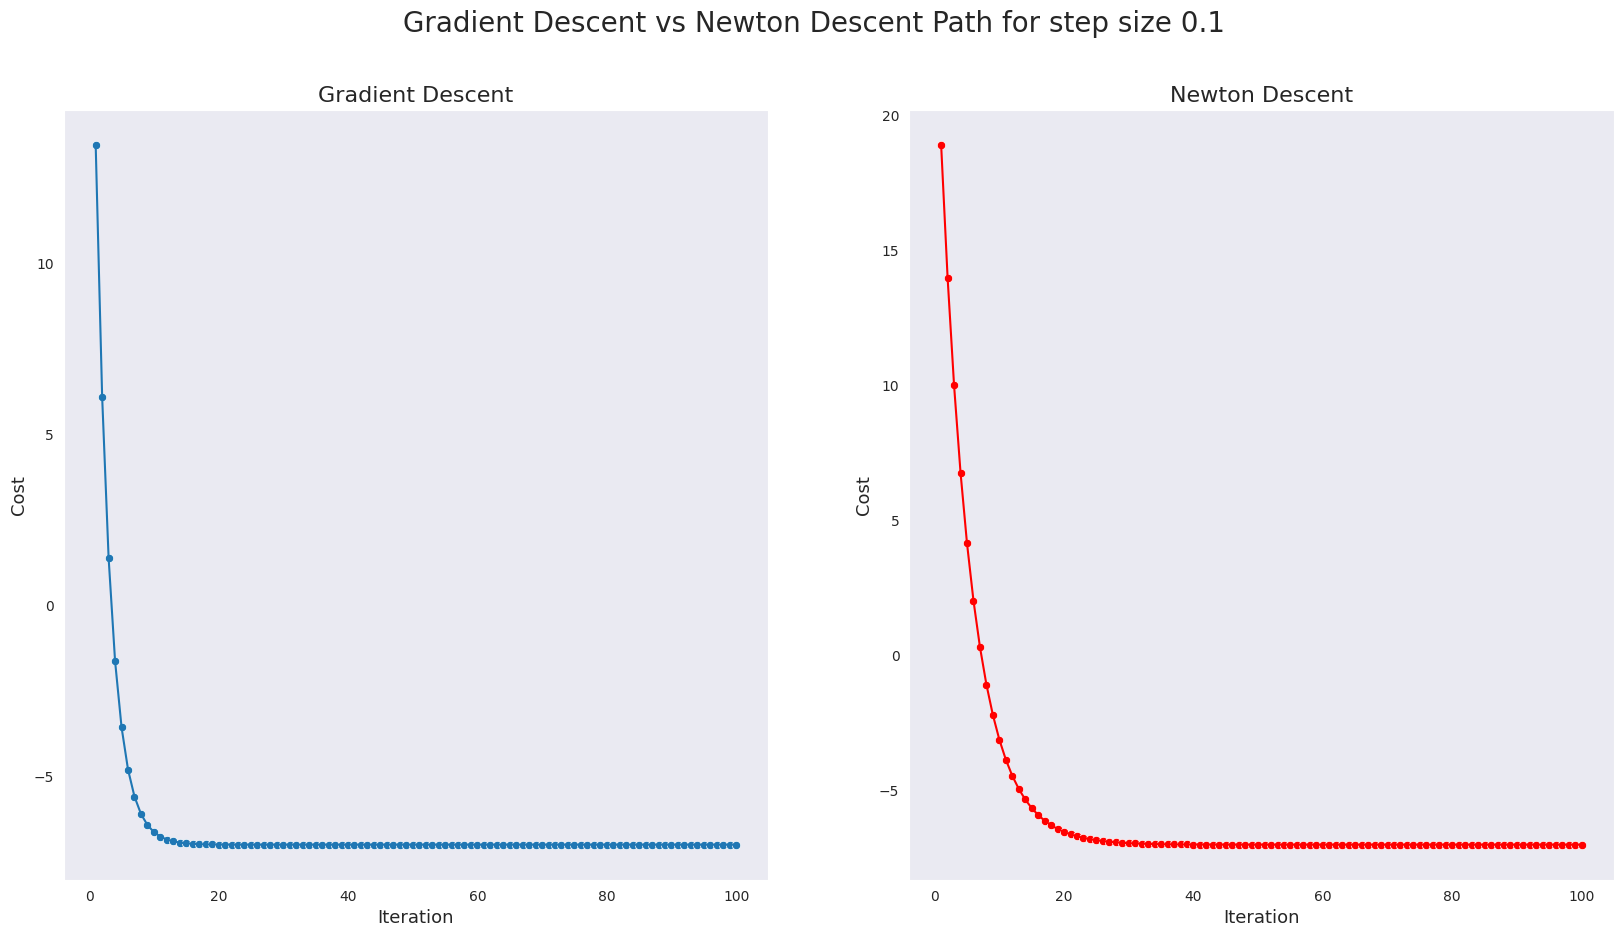

In [11]:
pts, cost = grad_descent(start_pt, 100, 0.1)
pts_newton, cost_newton = newton_descent(start_pt, 100, 0.1)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(20,10))
fig.suptitle('Gradient Descent vs Newton Descent Path for step size 0.1', fontsize = 20)

sns.lineplot(ax = ax1, x = list(range(1,len(cost) + 1)),y = cost)
sns.scatterplot(ax = ax1, x = list(range(1,len(cost) + 1)),y = cost)
ax1.set_title("Gradient Descent", fontsize = 16)
ax1.set_ylabel("Cost", fontsize = 13)
ax1.set_xlabel("Iteration", fontsize = 13)

sns.lineplot(ax = ax2, x = list(range(1,len(cost) + 1)),y = cost_newton, color = "red")
sns.scatterplot(ax = ax2, x = list(range(1,len(cost) + 1)),y = cost_newton, color = "red")
ax2.set_title("Newton Descent", fontsize = 16)
ax2.set_ylabel("Cost", fontsize = 13)
ax2.set_xlabel("Iteration", fontsize = 13)

plt.savefig("1b.png")

In [12]:
pts[-1], pts_newton[-1]

([4.000000000814815, -0.9999999991851857],
 [4.00010624559555, -0.9998937544044497])

In [13]:
cost[-1], cost_newton[-1]

(-7.0, -6.999999977423748)

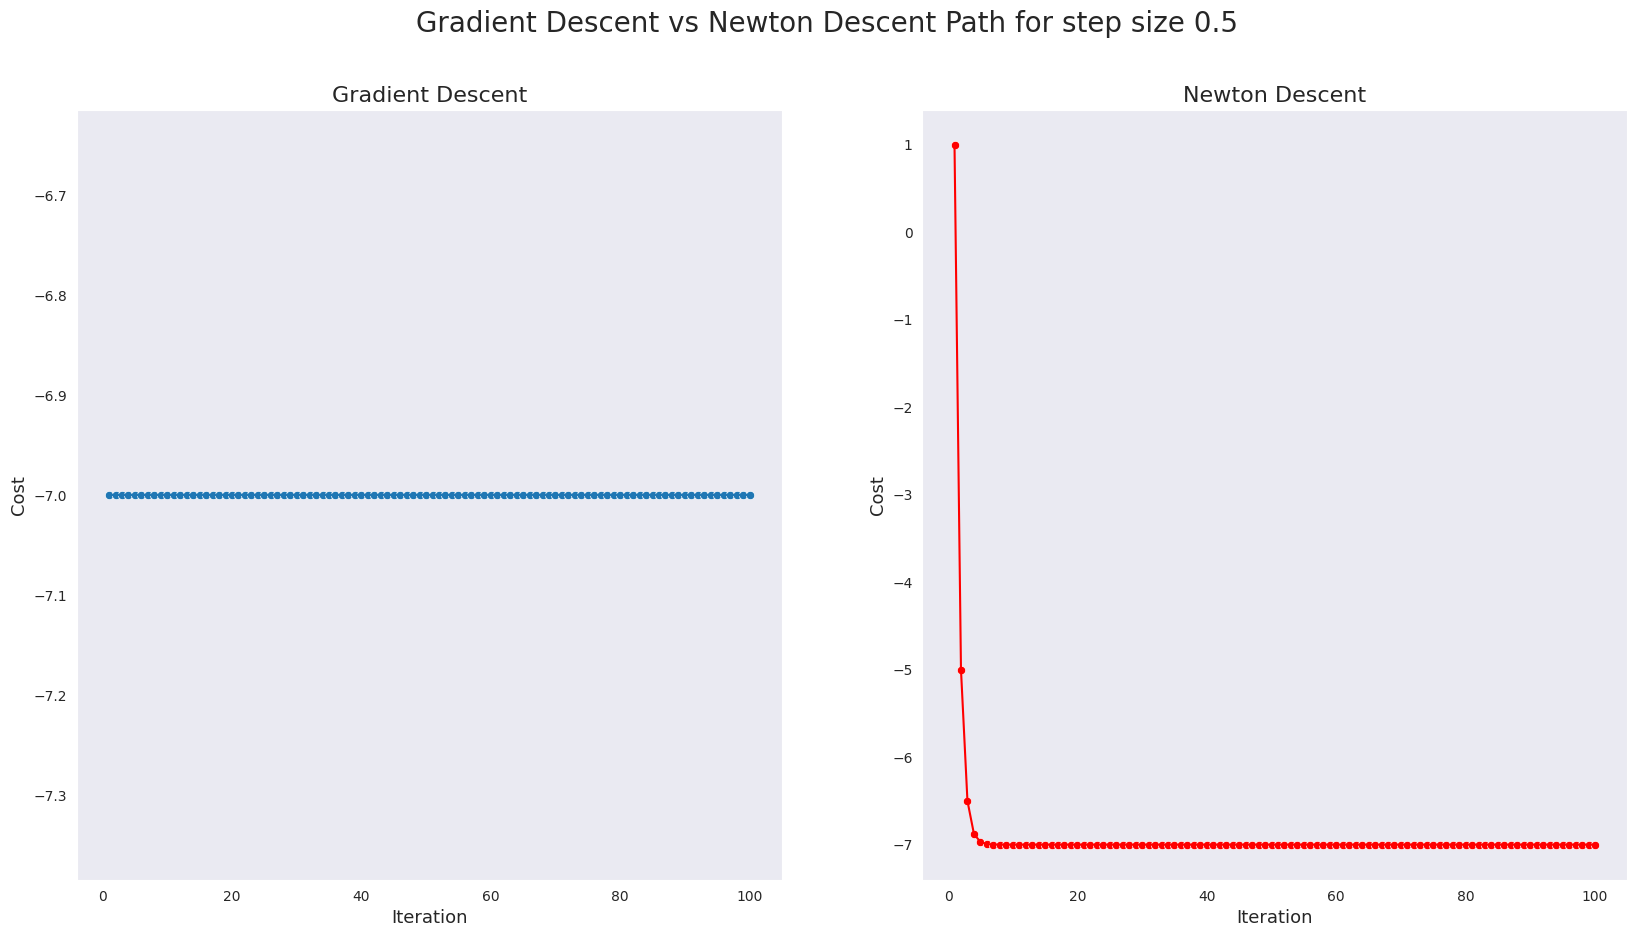

In [14]:
pts, cost = grad_descent(start_pt, 100, 0.5)
pts_newton, cost_newton = newton_descent(start_pt, 100, 0.5)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(20,10))
fig.suptitle('Gradient Descent vs Newton Descent Path for step size 0.5', fontsize = 20)

sns.lineplot(ax = ax1, x = list(range(1,len(cost) + 1)),y = cost)
sns.scatterplot(ax = ax1, x = list(range(1,len(cost) + 1)),y = cost)
ax1.set_title("Gradient Descent", fontsize = 16)
ax1.set_ylabel("Cost", fontsize = 13)
ax1.set_xlabel("Iteration", fontsize = 13)

sns.lineplot(ax = ax2, x = list(range(1,len(cost_newton) + 1)),y = cost_newton, color = "red")
sns.scatterplot(ax = ax2, x = list(range(1,len(cost_newton) + 1)),y = cost_newton, color = "red")
ax2.set_title("Newton Descent", fontsize = 16)
ax2.set_ylabel("Cost", fontsize = 13)
ax2.set_xlabel("Iteration", fontsize = 13)

plt.savefig("1b_0_5.png")

In [15]:
pts[-1], pts_newton[-1]

([4.0, -1.0], [4.0, -1.0])

In [16]:
cost[-1], cost_newton[-1]

(-7.0, -7.0)

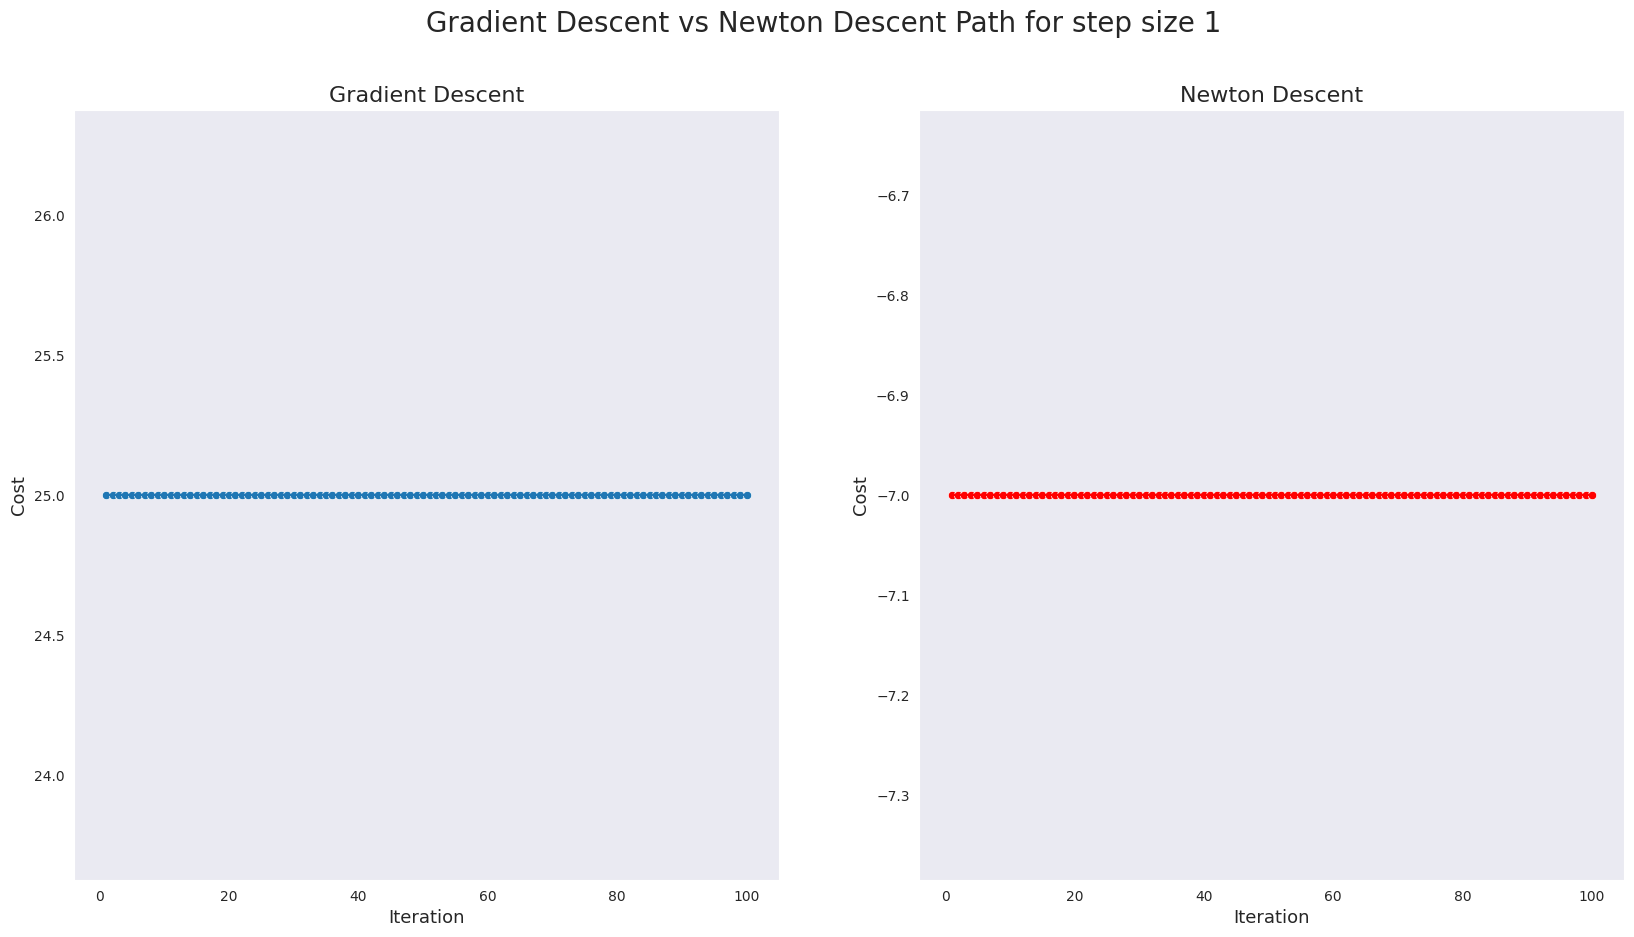

In [17]:
pts, cost = grad_descent(start_pt, 100, 1)
pts_newton, cost_newton = newton_descent(start_pt, 100, 1)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(20,10))
fig.suptitle('Gradient Descent vs Newton Descent Path for step size 1', fontsize = 20)

sns.lineplot(ax = ax1, x = list(range(1,len(cost) + 1)),y = cost)
sns.scatterplot(ax = ax1, x = list(range(1,len(cost) + 1)),y = cost)
ax1.set_title("Gradient Descent", fontsize = 16)
ax1.set_ylabel("Cost", fontsize = 13)
ax1.set_xlabel("Iteration", fontsize = 13)

sns.lineplot(ax = ax2, x = list(range(1,len(cost) + 1)),y = cost_newton, color = "red")
sns.scatterplot(ax = ax2, x = list(range(1,len(cost) + 1)),y = cost_newton, color = "red")
ax2.set_title("Newton Descent", fontsize = 16)
ax2.set_ylabel("Cost", fontsize = 13)
ax2.set_xlabel("Iteration", fontsize = 13)

plt.savefig("1b_1.png")

In [18]:
pts[-1], pts_newton[-1]

([8, 3], [4.0, -1.0])

In [19]:
cost[-1], cost_newton[-1]

(25, -7.0)

Question 2

In [20]:
from sympy import symbols, hessian, Function, N, cosh, derive_by_array
x, y = symbols('x y')
f = symbols('f', cls=Function)

In [21]:
f = cosh(0.05*np.power(x,2) + np.power(y,2))

In [22]:
f

cosh(0.05*x**2 + y**2)

In [23]:
f.subs([(x, 1), (y, 2)])

28.7074397100428

In [24]:
grad = derive_by_array(f, [x,y])
grad

[0.1*x*sinh(0.05*x**2 + y**2), 2*y*sinh(0.05*x**2 + y**2)]

In [25]:
grad.subs([(x, 1), (y, 2)])

[2.86900173354034, 114.760069341613]

In [26]:
hess = hessian(f, [x, y])
hess

Matrix([
[0.01*x**2*cosh(0.05*x**2 + y**2) + 0.1*sinh(0.05*x**2 + y**2),                           0.2*x*y*cosh(0.05*x**2 + y**2)],
[                               0.2*x*y*cosh(0.05*x**2 + y**2), 4*y**2*cosh(0.05*x**2 + y**2) + 2*sinh(0.05*x**2 + y**2)]])

In [27]:
hess.subs([(x, 1), (y, 2)])

Matrix([
[3.15607613064076, 11.4829758840171],
[11.4829758840171, 516.699070031492]])

In [28]:
start_pt = np.array([-2, 0.9])

In [29]:
def grad_descent_cosh(start_pt, iter, step):
  old_pt = start_pt
  pts = []
  cost = []
  new_pt = 0
  for i in range(iter):
    val = old_pt - step*grad.subs([(x, old_pt[0]), (y, old_pt[1])])
    pts.append([val[0], val[1]])
    cost.append(float(f.subs([(x, val[0]), (y,val[1])])))
    old_pt = val

  return pts, cost

In [30]:
def newton_descent_cosh(start_pt, iter, step):
  old_pt = start_pt
  pts = []
  cost = []
  new_pt = 0
  for i in range(iter):
    val = old_pt - np.dot(step*hess.subs([(x, old_pt[0]), (y, old_pt[1])]), grad.subs([(x, old_pt[0]), (y, old_pt[1])]))
    pts.append([val[0], val[1]])
    cost.append(float(f.subs([(x, val[0]), (y,val[1])])))
    old_pt = val

  return pts, cost

In [31]:
pts, cost = grad_descent_cosh(start_pt, 2000, 0.1)

In [32]:
pts_newton, cost_newton = newton_descent_cosh(start_pt, 2000, 0.1)

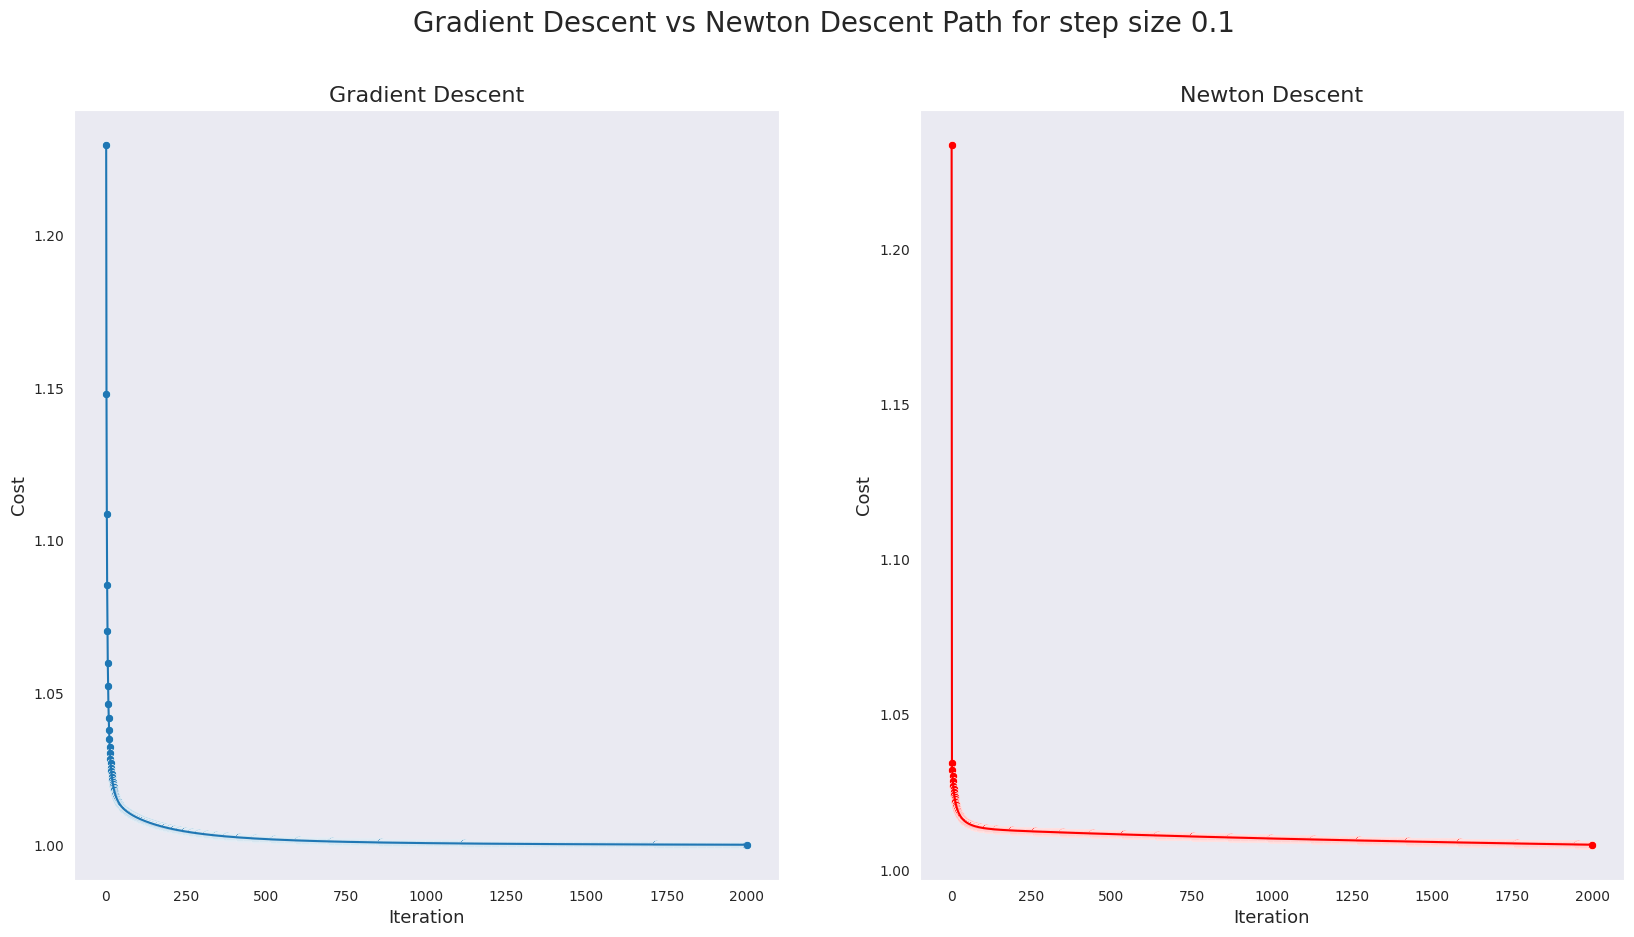

In [33]:
pts, cost = grad_descent_cosh(start_pt, 2000, 0.1)
pts_newton, cost_newton = newton_descent_cosh(start_pt, 2000, 0.1)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(20,10))
fig.suptitle('Gradient Descent vs Newton Descent Path for step size 0.1', fontsize = 20)

sns.lineplot(ax = ax1, x = list(range(1,len(cost) + 1)),y = cost)
sns.scatterplot(ax = ax1, x = list(range(1,len(cost) + 1)),y = cost)
ax1.set_title("Gradient Descent", fontsize = 16)
ax1.set_ylabel("Cost", fontsize = 13)
ax1.set_xlabel("Iteration", fontsize = 13)

sns.lineplot(ax = ax2, x = list(range(1,len(cost) + 1)),y = cost_newton, color = "red")
sns.scatterplot(ax = ax2, x = list(range(1,len(cost) + 1)),y = cost_newton, color = "red")
ax2.set_title("Newton Descent", fontsize = 16)
ax2.set_ylabel("Cost", fontsize = 13)
ax2.set_xlabel("Iteration", fontsize = 13)

plt.savefig("2b.png")

In [34]:
pts[-1], pts_newton[-1]

([-0.662845605127650, 1.83257138127492e-10],
 [-1.59666307582748, -1.65775080302127e-9])

In [35]:
cost[-1], cost_newton[-1]

(1.0002413109355466, 1.0081348788009183)

Question 3

In [36]:
f_new = symbols('f', cls=Function)
a, b = symbols('a b')

In [37]:
#f_new_2 = (-1 + a*b + 4*b)/(a + 4)
f_new = 1.5*(np.power(x,2) + np.power(y,2)) + (1 -2)*x*y - (x + y) + 1
f_new

1.5*x**2 - x*y - x + 1.5*y**2 - y + 1

In [38]:
grad_new = derive_by_array(f_new, [x, y])
#grad_new_2 = derive_by_array(f_new_2, [a,b])

In [39]:
grad_new

[3.0*x - y - 1, -x + 3.0*y - 1]

In [40]:
def grad_descent_third(start_pt, iter, step):
  old_pt = start_pt
  pts = []
  cost = []
  for i in range(iter):
    val = old_pt - step*grad_new.subs([(x, old_pt[0]), (y, old_pt[1])])
    pts.append([val[0], val[1]])
    cost.append(float(f_new.subs([(x, val[0]), (y,val[1])])))
    old_pt = val

  return pts, cost

In [41]:
start_pt = np.array([10.0,2.0])

In [42]:
pts, cost = grad_descent_third(start_pt, 100, 0.4)

In [43]:
cost[-1]

0.5

In [44]:
pts[-1]

[0.500000000000000, 0.500000000000000]

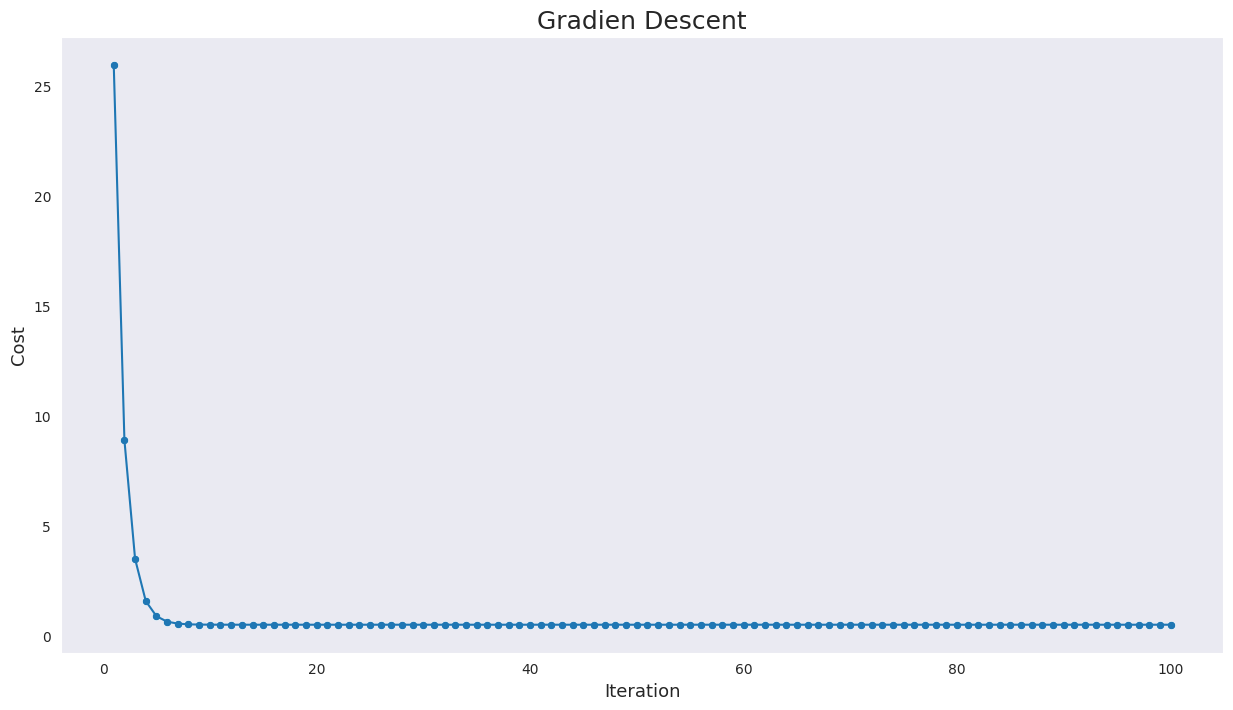

In [45]:
plt.figure(figsize = (15, 8))
sns.lineplot(x = list(range(1,len(cost) + 1)), y = cost)
sns.scatterplot(x = list(range(1,len(cost) + 1)),y = cost)
plt.title("Gradien Descent", fontsize = 18)
plt.xlabel("Iteration", fontsize = 13)
plt.ylabel("Cost", fontsize = 13)
plt.savefig("3.png")

Question 5

In [46]:
A = np.array([[0.9048, 0], [0.0952, 0]])
A

array([[0.9048, 0.    ],
       [0.0952, 0.    ]])

In [47]:
B = np.array([0.0952, 0.0048])
#B = B.reshape(2,1)
B

array([0.0952, 0.0048])

In [48]:
C = np.array([0, 1])
C

array([0, 1])

In [49]:
A_new = np.array([[0.9048, 0, 0],[0.0952, 1, 0], [0.0952, 1, 1]])
A_new

array([[0.9048, 0.    , 0.    ],
       [0.0952, 1.    , 0.    ],
       [0.0952, 1.    , 1.    ]])

In [50]:
B_new = np.array([0.0952, 0.0048, 0.0048])
B_new

array([0.0952, 0.0048, 0.0048])

In [51]:
C_new = np.array([0, 0, 1])
C_new

array([0, 0, 1])

In [52]:
N_c = 30
N_p = 30

In [53]:
l = []
for i in range(1, N_c + 1):
  res = np.dot(C_new, A_new)
  if i >= 2:
    for j in range(i - 1):
      new_res = np.dot(res, A_new)
      res = new_res
    
  l.append(res)
W = np.array(l)

In [54]:
umin = 0.0
umax = 0.6
delta_umin = -0.2
delta_umax = 0.2

In [55]:
m = []
for i in range(1, N_c + 1):
  res = np.dot(C_new, A_new)
  if i >= 2:
    for j in range(i - 1):
      new_res = np.dot(res, A_new)
      res = new_res
  res = np.dot(res, B_new)
  m.append(res)

In [56]:
big_m = []
for i in range(1, N_c + 1):
  new_l = i
  small_m = []
  for j in range(i):
    small_m.append(m[j])
  small_m = small_m[::-1]

  n_extra = N_c - len(small_m)
  for e in range(n_extra):
    small_m.append(0)
  
  big_m.append(small_m)

Z = np.array(big_m)

In [57]:
z_t_z = np.dot(Z.T, Z)

In [58]:
z_t_w = np.dot(Z.T, W)

In [59]:
z_t_rs = z_t_w[:,-1]

In [60]:
R = np.eye(N_c)

In [61]:
u = cp.Variable(N_c) 
#u = np.zeros((30,1))
u

Variable((30,))

In [62]:
u = cp.Variable(N_c)
du = cp.Variable(N_c)
x = cp.Variable((3, N_p+1))
x

Variable((3, 31))

In [63]:
A.shape

(2, 2)

Solution without constraints

In [64]:
x_use = np.array([0,0])
y_use = C @ x_use
init_use = np.hstack([x_use, y_use])

In [65]:
diff = z_t_rs - np.dot(z_t_w, init_use)
delta_u_solv = np.dot(np.linalg.inv(z_t_z), diff)
len(delta_u_solv)

30

In [66]:
u_solv = []
u_solv.append(delta_u_solv[0])
for i in range(0, len(delta_u_solv) - 1):
  u_solv.append(delta_u_solv[i] + delta_u_solv[i + 1])
len(u_solv)

30

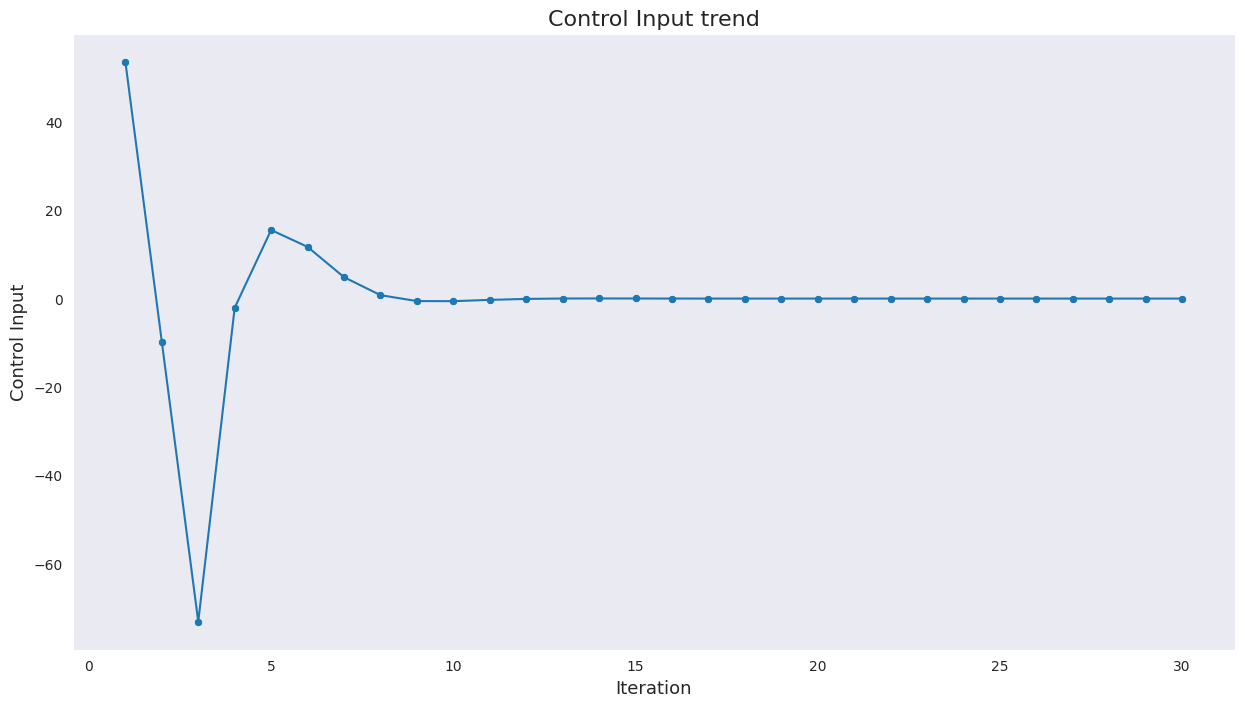

In [67]:
plt.figure(figsize = (15,8))
sns.lineplot(x = list(range(1,len(delta_u_solv) + 1)), y = list(u_solv))
sns.scatterplot(x = list(range(1,len(delta_u_solv) + 1)),y = list(u_solv))
plt.title("Control Input trend", fontsize = 16)
plt.xlabel("Iteration", fontsize = 13)
plt.ylabel("Control Input", fontsize = 13)
plt.savefig("5_no_constraints.png")

In [68]:
J = (1/2)*cp.quad_form(u, R)
#J = cp.sum_squares(u)
obj = cp.Minimize(J)

cons = [delta_umin <= u[0] - 0]
cons += [delta_umax >= u[0] - 0]
cons += [du[0] == u[0] - 0]
cons += [umin <= u[0]]
cons += [umax >= u[0]]
cons += [x[:2,0] == 0]
cons += [x[2,0] == C @ x[:2, 0]]
cons += [x[:,1] == A_new @ x[:,0] + B_new * du[0]]


In [69]:
for i in range(1, N_c):
  cons += [delta_umin <= u[i] - u[i-1]]
  cons += [delta_umax >= u[i] - u[i-1]]
  cons += [umin <= u[i]]
  cons += [umax >= u[i]]
  cons += [x[:,i] == A_new @ x[:,i-1] + B_new * du[i-1]]
  cons += [du[i] == u[i] - u[i-1]]

In [70]:
prob = cp.Problem(obj, cons)

In [71]:
result = prob.solve()

In [72]:
u.value

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [73]:
du.value

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [74]:
x.value

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

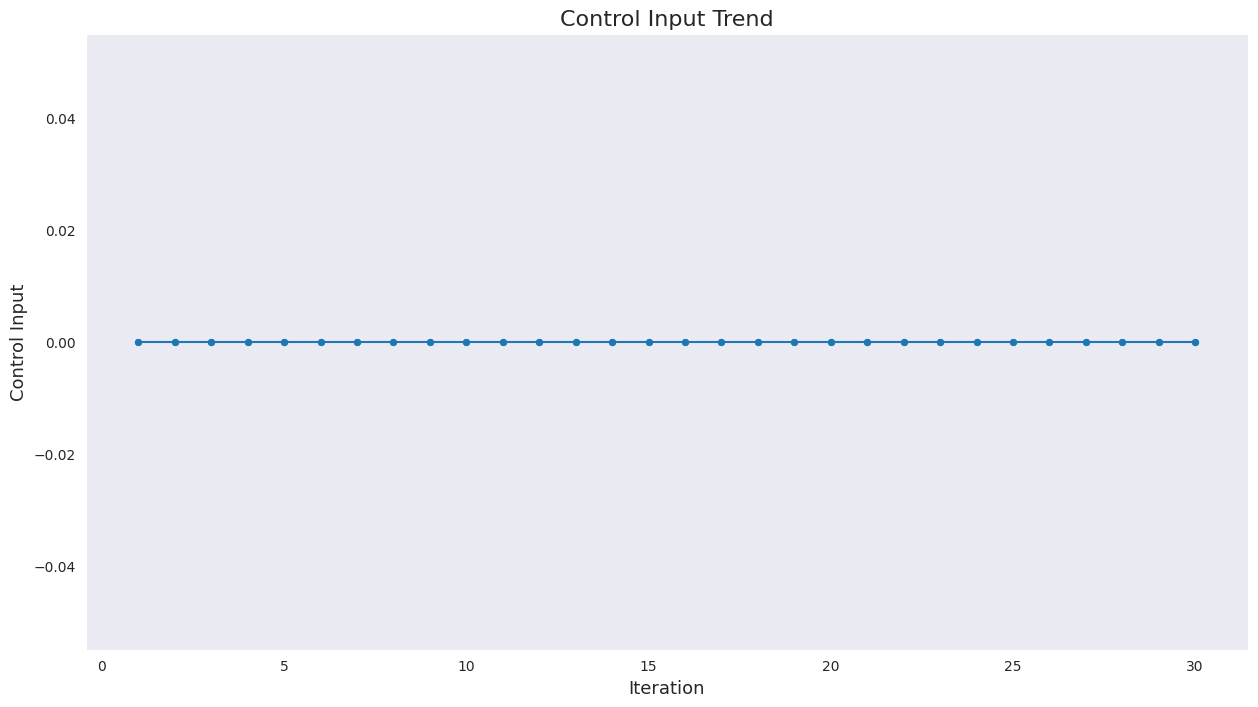

In [75]:
u_vals = list(u.value)
plt.figure(figsize = (15,8))
sns.lineplot(x = list(range(1,len(u_vals) + 1)), y = u_vals)
sns.scatterplot(x = list(range(1,len(u_vals) + 1)),y = u_vals)
plt.xlabel("Iteration", fontsize = 13)
plt.ylabel("Control Input", fontsize = 13)
plt.title("Control Input Trend", fontsize = 16)
plt.savefig("5_a.png")

Question 5 Part B

In [76]:
Z.shape

(30, 30)

In [77]:
u = cp.Variable(N_c)
du = cp.Variable(N_c)
x = cp.Variable((3, N_p+1))
Y = cp.Variable(N_p)
R = np.eye(N_p)
Q = np.eye(N_c)
r = np.ones(N_p)*0.5
J = (1/2)*cp.quad_form(u, 0.1*R) + (1/2)*cp.quad_form(r - Y, 10*Q)
obj = cp.Minimize(J)

cons = [delta_umin <= u[0] - 0]
cons += [delta_umax >= u[0] - 0]
cons += [du[0] == u[0] - 0]
cons += [umin <= u[0]]
cons += [umax >= u[0]]
cons += [x[:2,0] == 0]
cons += [x[2,0] == C @ x[:2, 0]]
cons += [x[:,1] == A_new @ x[:,0] + B_new * du[0]]
cons += [x[:, 0] <= 1]
cons += [x[:, 0] >= -1]
cons += [Y == W @ x[:,0] + Z @ du]

In [78]:
for i in range(1, N_c):
  cons += [delta_umin <= u[i] - u[i-1]]
  cons += [delta_umax >= u[i] - u[i-1]]
  cons += [umin <= u[i]]
  cons += [umax >= u[i]]
  cons += [x[:,i] == A_new @ x[:,i-1] + B_new * du[i-1]]
  cons += [du[i] == u[i] - u[i-1]]
  cons += [x[:, i] <= 1]
  cons += [x[:, i] >= -1]

In [79]:
prob = cp.Problem(obj, cons)

In [80]:
result = prob.solve()

In [81]:
du.value

array([ 1.99998141e-01,  1.99999377e-01,  2.00000564e-01,  3.80666926e-07,
       -4.64370467e-08, -1.95346616e-08,  5.98108710e-09,  3.24849106e-08,
        5.79860137e-08,  8.14668345e-08, -1.15016848e-01, -1.99999896e-01,
       -1.99999905e-01, -8.49829481e-02,  1.31460583e-07,  1.68041468e-07,
        2.09187350e-07,  2.52350093e-07,  2.93515865e-07,  3.28392148e-07,
        3.52701320e-07,  3.62158706e-07,  3.52452330e-07,  3.19213552e-07,
        2.57978275e-07,  1.64137865e-07,  3.28795477e-08, -1.40888177e-07,
       -3.62327597e-07, -6.55624659e-07])

In [82]:
u.value

array([ 1.99998149e-01,  3.99997533e-01,  5.99998103e-01,  5.99998487e-01,
        5.99998442e-01,  5.99998423e-01,  5.99998427e-01,  5.99998457e-01,
        5.99998510e-01,  5.99998585e-01,  4.84981729e-01,  2.84981824e-01,
        8.49819083e-02, -1.05100733e-06, -9.31747682e-07, -7.76745908e-07,
       -5.81277597e-07, -3.43131079e-07, -6.40707031e-08,  2.49882807e-07,
        5.88461514e-07,  9.37133473e-07,  1.27706168e-06,  1.58502964e-06,
        1.83332419e-06,  1.98956503e-06,  2.01647053e-06,  1.87154454e-06,
        1.50696641e-06,  8.50523244e-07])

In [83]:
u_vals = list(u.value)

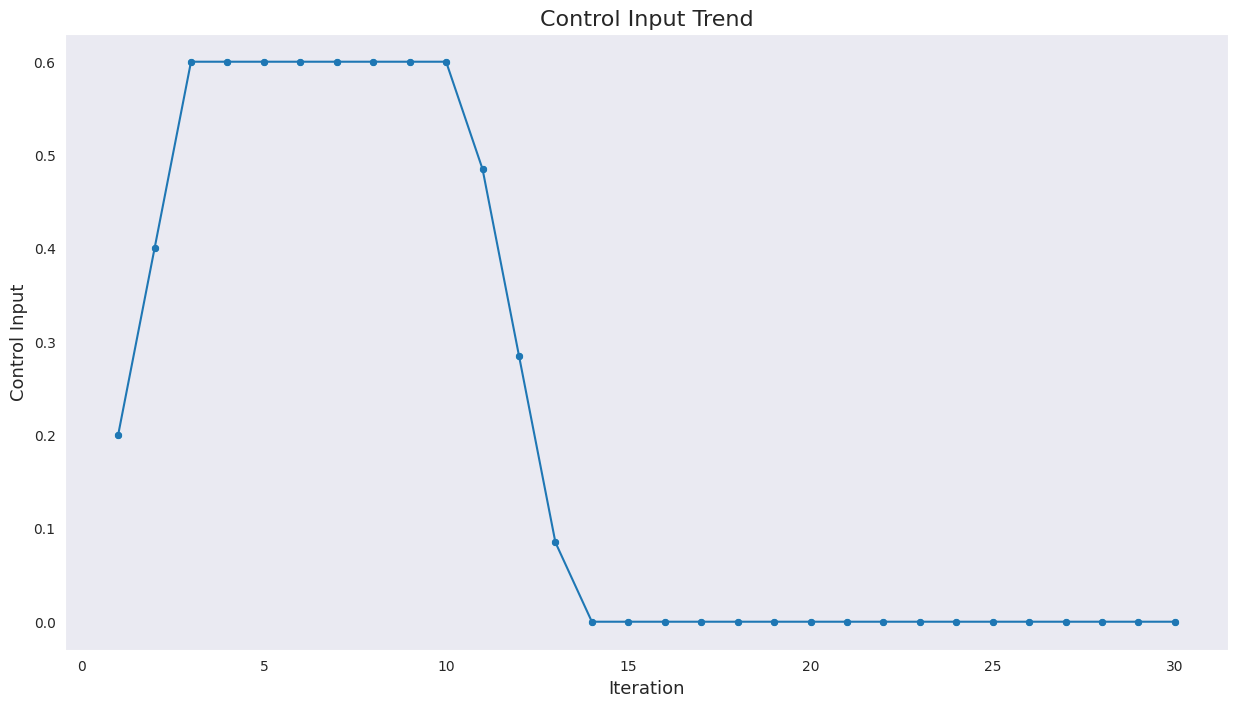

In [84]:
u_vals = list(u.value)
plt.figure(figsize = (15,8))
sns.lineplot(x = list(range(1,len(u_vals) + 1)), y = u_vals)
sns.scatterplot(x = list(range(1,len(u_vals) + 1)),y = u_vals)
plt.xlabel("Iteration", fontsize = 13)
plt.ylabel("Control Input", fontsize = 13)
plt.title("Control Input Trend", fontsize = 16)
plt.savefig("5_b.png")

Question 16.6

Minimum acceleration: 0.7822828724393067


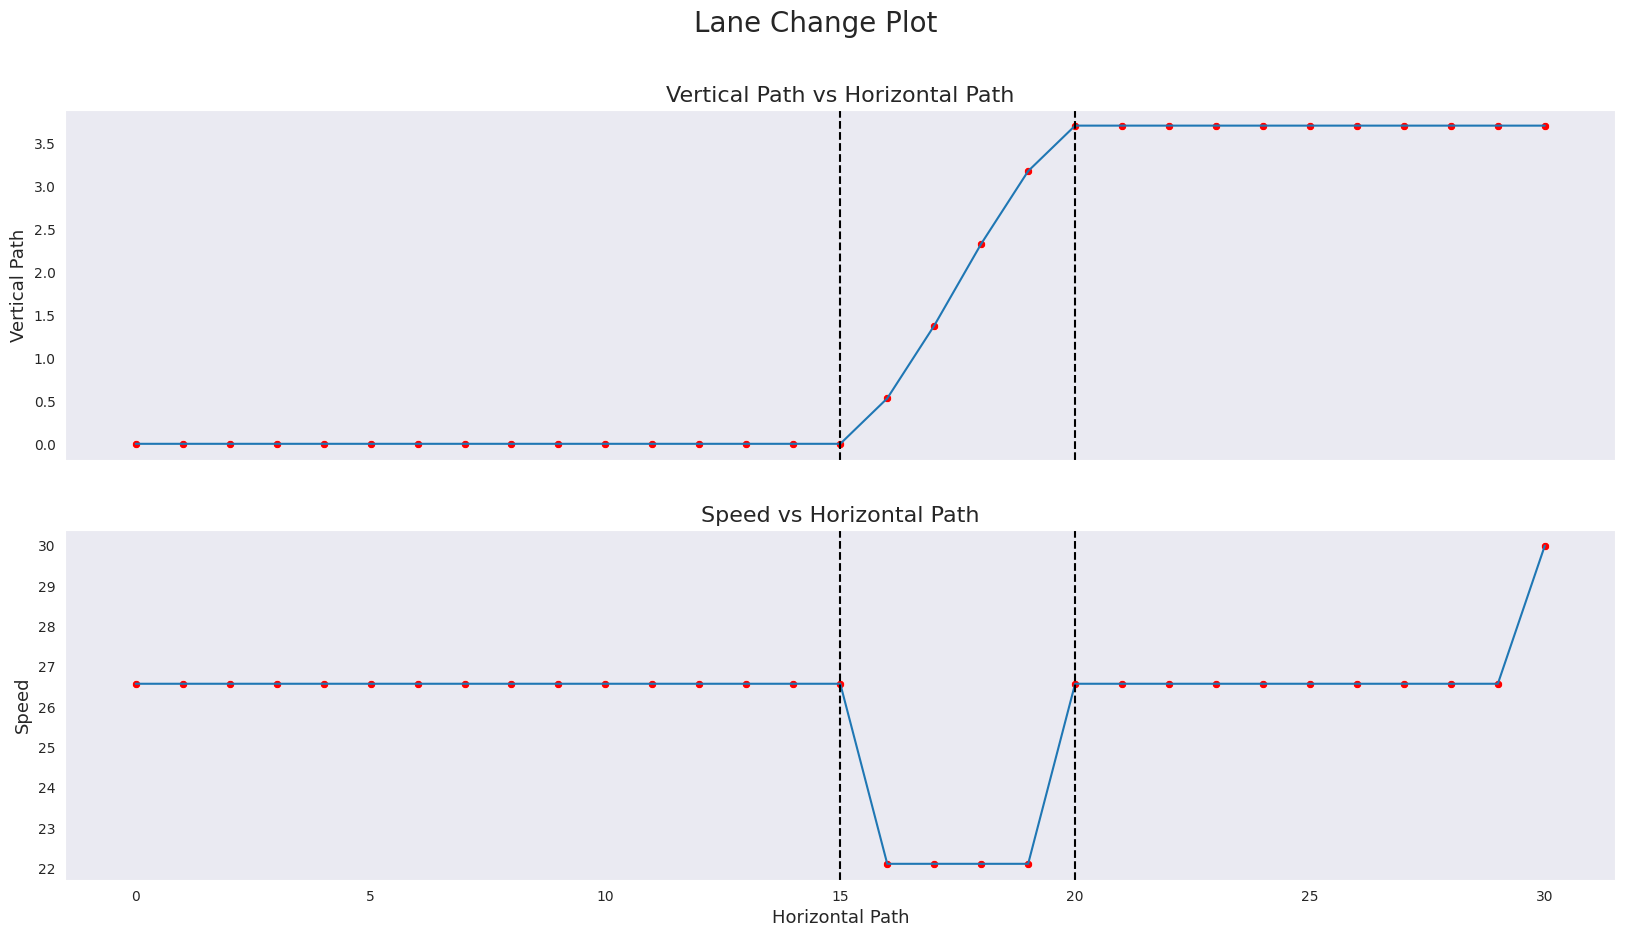

In [85]:
T = 30
T_start = 15
T_end = 20
S_min = 25
S_max = 35
L = 3.7

x = cp.Variable((T+1,))
y = cp.Variable((T+1,))
v = cp.Variable((T+1,))
p = cp.Variable((2, T + 1))

constraints = [
    x[0] == 0, 
    y[0] == 0, 
    p[0,:] == x,
    p[1,:] == y,
    y[T_end] == L, 
    y[0:T_start+1] == 0,
    v[:-1] >= cp.norm((p[:,1:] - p[:,:-1]), 2), 
    v <= S_max, 
    v[:T_start+1] >= S_min,
    v[T_end:] >= S_min, 
    y[T_end:] <= L
]

obj = cp.sum_squares((p[:,1:-1] - p[:,:-2]) -  (p[:,2:] - p[:,1:-1]))

problem = cp.Problem(cp.Minimize(obj), constraints)
problem.solve()

print("Minimum acceleration:", problem.value)

x_opt = x.value
y_opt = y.value
v_opt = v.value
t = np.arange(T+1)
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(20,10))
fig.suptitle('Lane Change Plot', fontsize = 20)


sns.lineplot(ax = ax1, x = t,y = y.value)
sns.scatterplot(ax = ax1, x = t,y = y.value, color = "red")
ax1.axvline(x = T_start, color = "black", linestyle = "dashed")
ax1.axvline(x = T_end, color = "black", linestyle = "dashed")
ax1.set_title("Vertical Path vs Horizontal Path", fontsize = 16)
ax1.set_ylabel("Vertical Path", fontsize = 13)
ax1.set_xlabel("Horizontal Path", fontsize = 13)

sns.lineplot(ax = ax2, x = t,y = v.value)
sns.scatterplot(ax = ax2, x = t,y = v.value, color = "red")
ax2.axvline(x = T_start, color = "black", linestyle = "dashed")
ax2.axvline(x = T_end, color = "black", linestyle = "dashed")
ax2.set_title("Speed vs Horizontal Path", fontsize = 16)
ax2.set_ylabel("Speed", fontsize = 13)
ax2.set_xlabel("Horizontal Path", fontsize = 13)
plt.savefig("16_7.png")
plt.show();

Question 16.7

Minimum energy: 1.0272481412254676e-09


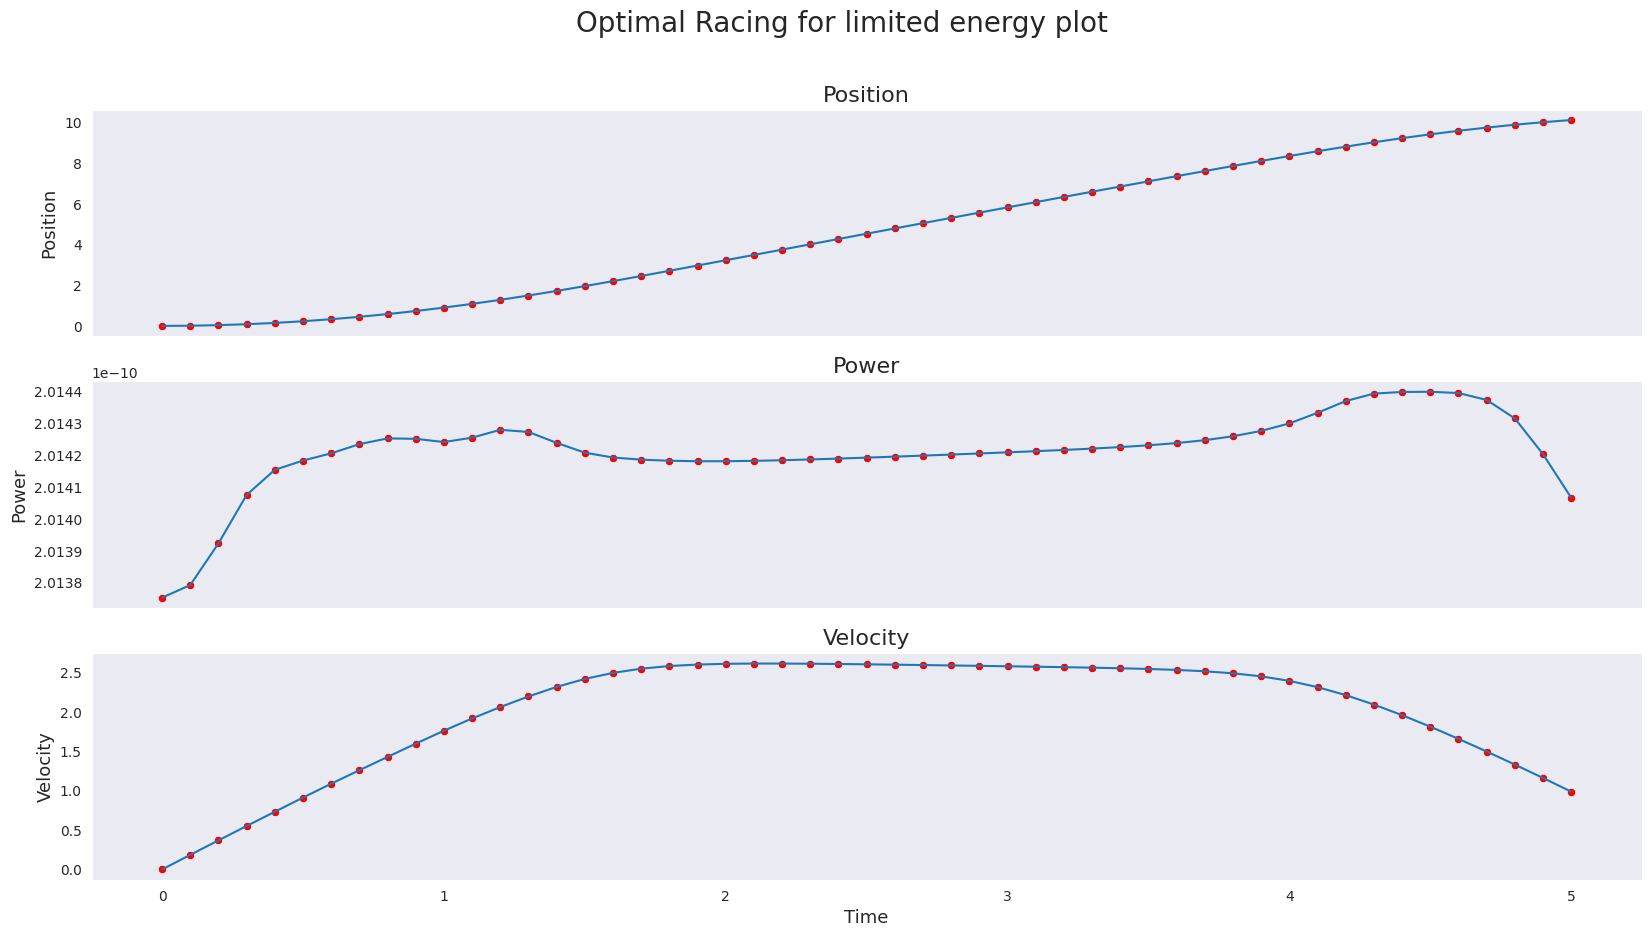

In [86]:
m = 10
x_final = 10
v_final = 1
v_max = 10
a_max = 2
c_loss = 2
h = 0.1
T = 5
n = int(T/h)
t = np.linspace(0, T, n+1)

p = cp.Variable(n+1)
x = cp.Variable(n+1)
v = cp.Variable(n+1)
k = cp.Variable(n+1)
p_loss = cp.Variable(n+1)

objective = cp.Minimize(h * cp.norm(p, 1))

constraints = [
    x[0] == 0, 
    v[0] == 0,
    x[n] >= x_final,
    v[n] <= v_final,
    p >= 0,
    k >= 0,
    x[1:] == x[:-1] + h/2*(v[:-1] + v[1:]),
    k >= 0.5*m*v**2 - 1e-2,
    v <= v_max,
    cp.abs(v[1:] - v[:-1])/h <= a_max,
    p_loss - cp.abs(v**3) >= 0,
    k[1:] - k[:-1] == h*p[:-1] - h*p[1:] - h*p_loss[:1],
]

problem = cp.Problem(objective, constraints)
problem.solve()


print("Minimum energy:", problem.value)

fig, (ax1,ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(20,10))
fig.suptitle('Optimal Racing for limited energy plot', fontsize = 20)


sns.lineplot(ax = ax1, x = t,y = x.value)
sns.scatterplot(ax = ax1, x = t,y = x.value, color = "red")
ax1.set_title("Position", fontsize = 16)
ax1.set_ylabel("Position", fontsize = 13)
ax1.set_xlabel("Time", fontsize = 13)

sns.lineplot(ax = ax2, x = t,y = p.value)
sns.scatterplot(ax = ax2, x = t,y = p.value, color = "red")
ax2.set_title("Power", fontsize = 16)
ax2.set_ylabel("Power", fontsize = 13)
ax2.set_xlabel("Time", fontsize = 13)


sns.lineplot(ax = ax3, x = t,y = v.value)
sns.scatterplot(ax = ax3, x = t,y = v.value, color = "red")
ax3.set_title("Velocity", fontsize = 16)
ax3.set_ylabel("Velocity", fontsize = 13)
ax3.set_xlabel("Time", fontsize = 13)
plt.savefig("16_7.png")
plt.show();

Question 16.8

**A**

Optimal J: 0.29514401291689085


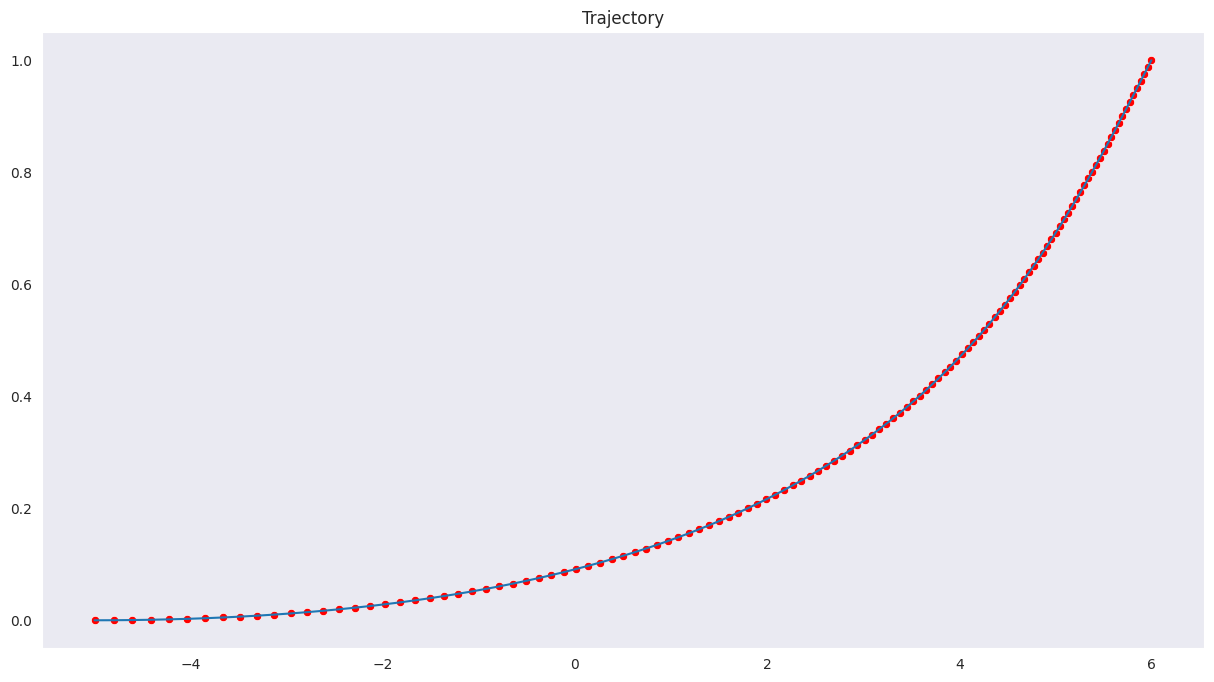

In [87]:
x_initial = np.array([-5, 0])
x_final = np.array([6, 1])
v_initial = np.array([2, 0])
T = 12
h = 0.1
n = int(T/h)

x = cp.Variable((2, n + 1))
v = cp.Variable((2, n + 1))
a = cp.Variable((2, n + 1))

objective = cp.Minimize(h * cp.sum_squares(a))

constraints = [
    x[:,0] == x_initial,
    x[:,-1] == x_final,
    v[:,0] == v_initial,
    x[:,1:] == x[:,:-1] + 0.5*h*(v[:,1:] + v[:,:-1]),
    v[:,1:] == v[:,:-1] + h*a[:,:-1]
]

problem = cp.Problem(objective, constraints)
problem.solve()

# Print results
print("Optimal J:", problem.value)

a,b = x.value[0,:], x.value[1,:]
plt.figure(figsize = (15,8))
sns.scatterplot(x = a, y = b, color = "red")
sns.lineplot(x =a, y =b)
plt.title("Trajectory")
plt.savefig("16_8.png")
plt.show();

**B**

In [88]:
def opt():
  x_initial = np.array([-5, 0])
  x_final = np.array([6, 1])
  v_initial = np.array([2, 0])
  T = 12
  h = 0.1
  n = int(T/h)

  x = cp.Variable((2, n + 1))
  v = cp.Variable((2, n + 1))
  a = cp.Variable((2, n + 1))

  objective = cp.Minimize(h * cp.sum_squares(a))

  constraints = [
      x[:,0] == x_initial,
      x[:,-1] == x_final,
      v[:,0] == v_initial,
      x[:,1:] == x[:,:-1] + 0.5*h*(v[:,1:] + v[:,:-1]),
      v[:,1:] == v[:,:-1] + h*a[:,:-1]
  ]

  problem = cp.Problem(objective, constraints)
  problem.solve()
  return x.value, v.value, a.value



Optimal J: 0.2934611693201423


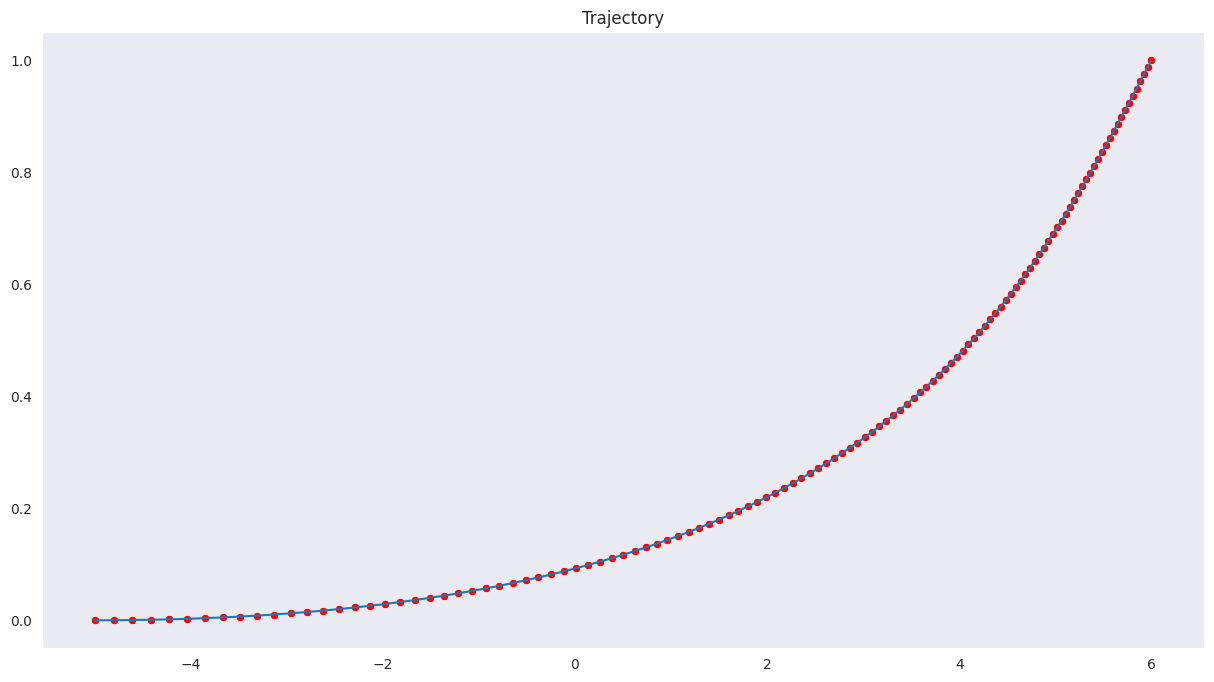

In [89]:
x_old, v_old, a_old = opt()

x_initial = np.array([-5, 0])
x_final = np.array([6, 1])
v_initial = np.array([2, 0])
T = 12
h = 0.1
n = int(T/h)

x = cp.Variable((2, n))
v = cp.Variable((2, n))
a = cp.Variable((2, n))
#c = cp.Variable((2, n))
c_use = []
for i in range(1):
  c_use.append(x_old[:,i]/cp.norm(x_old[:,i], 2).value)
c_use = np.array(c_use)

objective = cp.Minimize(h*cp.sum_squares(a))

constraints = [
      x[:,0] == x_initial,
      x[:,-1] == x_final,
      v[:,0] == v_initial,
      x[:,1:] == x[:,:-1] + 0.5*h*(v[:,1:] + v[:,:-1]),
      v[:,1:] == v[:,:-1] + h*a[:,:-1],
      c_use @ x[:,0] >= 1,
]

#for i in range(1, n):
 # constraints += [c[:, i] == x[:,i - 1]/cp.norm(x[:,i - 1], 2)]
  #constraints += [c[:, i] @ x[:,i] >= 1]


problem = cp.Problem(objective, constraints)
problem.solve(solver = cp.ECOS)

print("Optimal J:", problem.value)

a_2,b_2 = x.value[0,:], x.value[1,:]
plt.figure(figsize = (15,8))
sns.scatterplot(x = a_2, y = b_2, color = "red")
sns.lineplot(x =a_2, y =b_2)
plt.title("Trajectory")
plt.savefig("16_8.png")
plt.show();

C

In [90]:
x_old, v_old, a_old = opt()
cost = []
for i in range(100):

  x_initial = np.array([-5, 0])
  x_final = np.array([6, 1])
  v_initial = np.array([2, 0])
  T = 12
  h = 0.1
  n = int(T/h)
  x = cp.Variable((2, n))
  v = cp.Variable((2, n))
  a = cp.Variable((2, n))

  c_use = []
  for i in range(n):
    c_use.append(x_old[:,i]/cp.norm(x_old[:,i], 2).value)
  c_use = np.array(c_use)

  objective = cp.Minimize(h*cp.sum_squares(a))

  constraints = [
        x[:,0] == x_initial,
        x[:,-1] == x_final,
        v[:,0] == v_initial,
        x[:,1:] == x[:,:-1] + 0.5*h*(v[:,1:] + v[:,:-1]),
        v[:,1:] == v[:,:-1] + h*a[:,:-1],
        c_use @ x >= 1,
  ]

  #for i in range(1, n):
  # constraints += [c[:, i] == x[:,i - 1]/cp.norm(x[:,i - 1], 2)]
    #constraints += [c[:, i] @ x[:,i] >= 1]


  problem = cp.Problem(objective, constraints)
  problem.solve()

  cost.append(problem.value)
  x_old = x.value
  v_old = v.value
  a_old = a.value


SolverError: ignored

In [ ]:
cost[-1]